In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis = 'columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull() # coerce means all the error value will be ignored and filled with N.A

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()].shape

(11, 20)

In [9]:
df.iloc[455].TotalCharges

'2494.65'

In [10]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
 pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [12]:
df1.TotalCharges =pd.to_numeric(df1.TotalCharges)

C:\Users\jenish\AppData\Local\Temp\ipykernel_12056\1720090683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges =pd.to_numeric(df1.TotalCharges)


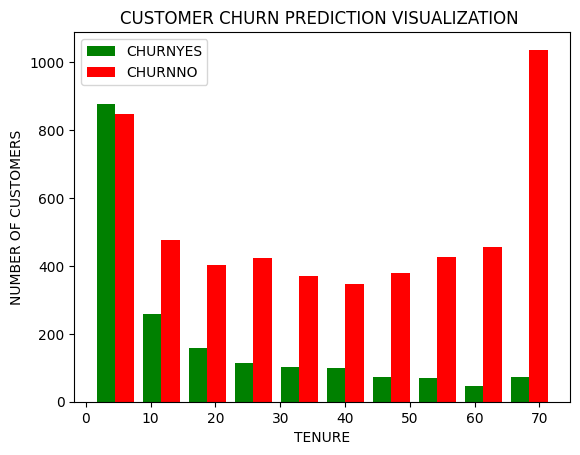

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel("TENURE")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("CUSTOMER CHURN PREDICTION VISUALIZATION ")
plt.hist([tenure_churn_yes ,tenure_churn_no],color = ['green','red'],label =['CHURNYES','CHURNNO'] )
plt.legend()

In [14]:
def print_unique_col_values(df):
      for col in df:
          if df[col].dtypes =='object':
             print(f'{col} :{df[col].unique()}')

In [15]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [16]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\jenish\AppData\Local\Temp\ipykernel_12056\477714218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)
C:\Users\jenish\AppData\Local\Temp\ipykernel_12056\477714218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [17]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\jenish\AppData\Local\Temp\ipykernel_12056\975989322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\jenish\AppData\Local\Temp\ipykernel_12056\975989322.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,

In [19]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [20]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\jenish\AppData\Local\Temp\ipykernel_12056\698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\jenish\AppData\Local\Temp\ipykernel_12056\698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [21]:
df2 = pd.get_dummies(data = df1,columns=['InternetService','Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [22]:
cols_toscale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_toscale] = scaler.fit_transform(df2[cols_toscale])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7006,0,0,0,0,0.549296,1,1,0,1,1,...,False,True,False,True,False,False,False,True,False,False
6597,1,0,0,0,0.084507,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
1554,0,0,0,0,0.352113,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
5748,1,0,0,0,0.281690,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1813,0,0,0,0,0.000000,1,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False


In [23]:
X= df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [25]:
import tensorflow as tf 
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid'), 
]) 
model.compile(optimizer ='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.7197 - loss: 0.5639
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.7854 - loss: 0.4454
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.7985 - loss: 0.4225
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7903 - loss: 0.4264
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8012 - loss: 0.4161
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7953 - loss: 0.4220
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.8036 - loss: 0.4192
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.8035 - loss: 0.4188
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8050 - loss: 0.4068
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8133 - loss: 0.4021
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.8043 - loss: 0.4116
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8081 - loss: 0.4309


[0.44308212399482727, 0.7924662232398987]

In [27]:
import tensorflow as tf
from tensorflow import keras 
from sklearn.metrics import confusion_matrix , classification_report

In [28]:
def ANN(X_train,y_train,X_test,y_test,loss , weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    model.compile(optimizer = 'adam',loss = loss , metrics = ['accuracy'])
    if weights ==-1:
        model.fit(X_train,y_train, epochs = 100)
    else:
        model.fit(X_train, y_train,epochs = 100,class_weights = weights)

    print(model.evaluate(X_test,y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification report: \n", classification_report(y_test,y_preds))
    return y_preds 

In [29]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.6617 - loss: 0.6108
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.7954 - loss: 0.4324
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8010 - loss: 0.4228
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8057 - loss: 0.4102
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8096 - loss: 0.4038
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8089 - loss: 0.4110
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8012 - loss: 0.4207
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.7997 - loss: 0.4197
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8096 - loss: 0.4111
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.8106 - loss: 0.4091
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.8039 - loss: 0.4047
Epoch 12/100
176/176 ━━━━━━━━━━

In [30]:
# METHOD 1 - UNDER SAMPLING
count_class_0 , count_class_1 = df1.Churn.value_counts()
df_class_0 = df2[df2['Churn'] == 0]
df_class_1= df2[df2['Churn'] == 1]

In [31]:
df_class_0.shape

(5163, 27)

In [32]:
df_class_1.shape

(1869, 27)

In [33]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under , df_class_1],axis = 0)

df_test_under.shape

(3738, 27)

In [34]:
X = df_test_under.drop('Churn',axis = 'columns')
y = df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =15, stratify =  y)

In [35]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.5822 - loss: 0.6721
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7310 - loss: 0.5438
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.7734 - loss: 0.4888
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7679 - loss: 0.4834
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.7623 - loss: 0.5068
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.7560 - loss: 0.4887
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.7673 - loss: 0.4871
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.7688 - loss: 0.4703
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7738 - loss: 0.4721
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.7673 - loss: 0.4806
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7876 - loss: 0.4614
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step

In [36]:
# METHOD 2 - OVER SAMPLING

In [37]:
count_class_0 , count_class_1 

(5163, 1869)

In [38]:
df_class_1.shape
df_class_1.sample(2000 , replace =True).shape # sample will return us 2000 samples from the data by duplicating them 
# class 0 has more sample so we want same number of samples in class 1 so we will just copy them 

(2000, 27)

In [39]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0)
df_test_over.shape
print('RANDOM OVER-SAMPLING')
print(df_test_over.Churn.value_counts())

RANDOM OVER-SAMPLING
Churn
0    5163
1    5163
Name: count, dtype: int64


In [40]:
X = df_test_over.drop('Churn',axis = 'columns')
y = df_test_over['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =15, stratify =  y)

In [41]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [42]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.6506 - loss: 0.6157
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.7633 - loss: 0.4869
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.7714 - loss: 0.4740
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7691 - loss: 0.4758
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.7719 - loss: 0.4720
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.7806 - loss: 0.4625
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.7832 - loss: 0.4589
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7860 - loss: 0.4600
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.7882 - loss: 0.4544
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.7793 - loss: 0.4589
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7846 - loss: 0.4567
Epoch 12/100
259/259 ━━━━━━━━━━

# METHOD-3 SMOTE - IT JUST CREATES SYNTHETIC SAMPLES INSTEAD OF COPYING THEM 

In [43]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm , y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.2,random_state =15, stratify =  y_sm)

In [45]:
y_train.value_counts()
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [46]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - accuracy: 0.7226 - loss: 0.5611
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.7757 - loss: 0.4687
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.7895 - loss: 0.4564
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.7880 - loss: 0.4527
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.7894 - loss: 0.4479
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.7967 - loss: 0.4508
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.7844 - loss: 0.4528
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.7962 - loss: 0.4376
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7917 - loss: 0.4403
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8002 - loss: 0.4363
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8037 - loss: 0.4293
Epoch 12/100
259/259 ━━━━━━━━━━

# METHOD - 4 USE OF ENSEMBLE WITH UNDERSAMPLING

In [59]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =15, stratify =  y)

In [60]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [61]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [62]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [66]:
def get_train_batch(df_majority, df_minority,start,end):
    df_train = pd.concat([df3_class0[:1495],df3_class1],axis = 0)
    X_train = df_train.drop('Churn',axis = 'columns')
    y_train = df_train.Churn
    return X_train,y_train

In [68]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.6567 - loss: 0.6227
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7551 - loss: 0.5140
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.7647 - loss: 0.4944
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7706 - loss: 0.4883
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7697 - loss: 0.4831
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.7770 - loss: 0.4857
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7692 - loss: 0.4815
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.7622 - loss: 0.4967
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7705 - loss: 0.4826
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.7832 - loss: 0.4606
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.7669 - loss: 0.4657
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step

In [69]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.5088 - loss: 0.6935
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.7416 - loss: 0.5372
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.7530 - loss: 0.5012
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.7616 - loss: 0.4890
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7568 - loss: 0.4980
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7698 - loss: 0.4760  
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7714 - loss: 0.4709
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.7817 - loss: 0.4615
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.7778 - loss: 0.4621
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7842 - loss: 0.4594
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.7684 - loss: 0.4716
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step

In [70]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.5960 - loss: 0.6646
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7650 - loss: 0.5080
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.7642 - loss: 0.5011
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.7675 - loss: 0.4757
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.7776 - loss: 0.4693
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.7707 - loss: 0.4851
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.7657 - loss: 0.4815
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.7711 - loss: 0.4746
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.7701 - loss: 0.4714
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.7872 - loss: 0.4566
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7716 - loss: 0.4721
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step

In [72]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [73]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407

